# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [992]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code
#liceness=pd.read_excel(r'./saudi-arabia-driving-licenses-2004-2008.xlsx')
#traffic=pd.read_excel(r'./saudi-arabia-traffic-accidents-2008.xlsx')


In [993]:
D_L= pd.read_csv('saudi-arabia-driving-licenses-2004-2008.csv', delimiter= ";")
T_A=pd.read_csv('saudi-arabia-traffic-accidents-2008.csv',delimiter= ";")

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [994]:
#Code
D_L.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [995]:
T_A.head(10)


,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
The first dataframe contain the licenses issued based on year and the region and the second dataframe describe the indicator issued based on year and the region it happend .

#### 4a. How complete is the data?

Investigate missing values etc.

In [996]:
#Code
T_A.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [997]:
D_L.isnull().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [998]:
#Code
T_A.describe()

,Unnamed: 0,Unnamed: 0.1
count,84.000000,84.000000
mean,41.500000,41.500000
std,24.392622,24.392622
min,0.000000,0.000000
25%,20.750000,20.750000
50%,41.500000,41.500000
75%,62.250000,62.250000
max,83.000000,83.000000


In [999]:
D_L.describe()

,Unnamed: 0
count,350.000000
mean,174.500000
std,101.180532
min,0.000000
25%,87.250000
50%,174.500000
75%,261.750000
max,349.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [1000]:
#code
print(D_L.dtypes)


Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object


In [1001]:
print(T_A.dtypes)

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

yes .
The value , year ,Driving Liceses should be an 'int' and geo_point_2d should be a 'float'.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [1002]:
#code
T_A['Value']=T_A.Value.apply(lambda x:x.replace('n',''))
T_A['Value']=pd.to_numeric(T_A.Value)
T_A.Value.dtypes


dtype('int64')

In [1003]:
T_A['Year']=T_A.Year.apply(lambda x:str(x).replace(')','').replace('(',''))
T_A['Year']=pd.to_numeric(T_A.Year)
T_A.Year.dtypes


dtype('int64')

In [1004]:
D_L['Year']=D_L.Year.apply(lambda x:str(x).replace(')','').replace('(',''))
D_L['Year']=pd.to_numeric(D_L.Year)
D_L.Year.dtypes

dtype('int64')

In [1005]:
D_L['Driving Liceses']=D_L['Driving Liceses'].apply(lambda x:str(x).replace('n',''))
D_L['Driving Liceses']=pd.to_numeric(D_L['Driving Liceses'])
D_L['Driving Liceses'].dtypes

dtype('int64')

- Make new columns `x` and `y` using `geo_point_2d`

In [1006]:
#code
T_A['X']=T_A['geo_point_2d'].apply(lambda  x : str(x).split(',')[0])
T_A['y']=T_A['geo_point_2d'].apply(lambda x : str(x).split(',')[-1])
T_A.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,X,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [1007]:
D_L['X']=D_L['geo_point_2d'].apply(lambda  x : str(x).split(',')[0])
D_L['y']=D_L['geo_point_2d'].apply(lambda x : str(x).split(',')[-1])
D_L.tail()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,X,y
345,345,2000,Tabouk,8473,"27.90165499, 37.2598581394",27.90165499,37.2598581394
346,346,2006,Tabouk,8259,"27.90165499, 37.2598581394",27.90165499,37.2598581394
347,347,2013,Hail,9731,"27.400845724, 41.4406960508",27.400845724,41.4406960508
348,348,1997,Hail,6606,"27.400845724, 41.4406960508",27.400845724,41.4406960508
349,349,1999,Hail,3139,"27.400845724, 41.4406960508",27.400845724,41.4406960508


- Fix any individual values preventing other columns from being the appropriate type.

In [1008]:
#code
T_A['X']=T_A['X'].astype(float)
T_A['y']=T_A['y'].astype(float)
D_L['X']=D_L['X'].astype(float)
D_L['y']=D_L['y'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [1009]:
#code
D_L.dtypes
T_A.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
X               float64
y               float64
dtype: object

- Display the data types again to confirm they are correct.

In [1010]:
#Code:
display(D_L.dtypes)
display(T_A.dtypes)

Unnamed: 0               int64
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
X                      float64
y                      float64
dtype: object

Unnamed: 0        int64
Unnamed: 0.1      int64
Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
X               float64
y               float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [1011]:
#code
traffic_accidents=T_A.rename(columns={
    'Unnamed: 0':'number0',
    'Unnamed: 0.1':'number1',
    'Year':'year',
    'Region':'region',
    'Indicator':'indicator',
    'Value' :'value'
    
    
})

In [1012]:
driving_licenses=D_L.rename(columns={
    'Unnamed: 0':'number',
    'Year':'year',
    'Administritive Area':'region',
    'Driving Liceses':'driving_liceses',
    
    
    
})

In [1013]:
del traffic_accidents['number0']
del traffic_accidents['number1']
del driving_licenses['number'] 
traffic_accidents.head()

,year,region,indicator,value,geo_point_2d,X,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


|Feature |  Type  | Dataset | Description |
|---|---|---|---|
|year|integr|Driving_Licenses / Traffic_Accidents|The year where the driver's license was issued and Accidents happen|
|region|string|Driving_Licenses / Traffic_Accidents|the region for each driving licenses was issued and Accidents happen|
|driving_license|intger|saudi_drivlicenses|Number of driving licenses issued |
|indicator|string| Traffic_Accidents | Describe incidents |
|value|integr| Traffic_Accidents |Describe  the number of indicator |
|  geo_point_2d  | string | Driving_Licenses / Traffic_Accidents |Region location coordinates |
|x| float | Driving_Licenses / Traffic_Accidents | x coordinate for region |
|y| float | Driving_Licenses / Traffic_Accidents | y coordinate for region |






#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [1014]:
#code

print(driving_licenses.region.unique())


['Makkah' 'Madinah' 'Al-Qaseem' 'Eastern' 'Assir' 'Tabouk' 'Hail'
 'Northern Boarder' 'Jazan' 'Najran' 'Al-Baha' 'Al-Jouf' 'Total' 'Riyadh']


In [1015]:
print(traffic_accidents.region.unique())

['Makkah' 'Eastern Region' 'Tabouk' 'Hail' 'Northern Boarder' 'Jazan'
 'Al-Jouf' 'Total' 'Al-Baaha' 'Riyadh' 'Madinah' 'Qassim' 'Najran' 'Asir']


In [1016]:
traffic_accidents.drop(traffic_accidents.index[traffic_accidents['region']== 'Total' ],inplace=True )
driving_licenses.drop(driving_licenses.index[driving_licenses['region']== 'Total' ],inplace=True )

In [1017]:
traffic_accidents['region']=traffic_accidents.region.replace('Eastern Region','Eastern')
traffic_accidents['region']=traffic_accidents.region.replace('Asir','Assir')
traffic_accidents['region']=traffic_accidents.region.replace('Qassim','Al-Qaseem')
traffic_accidents['region']=traffic_accidents.region.replace('Al-Baaha','Al-Baha')

In [1018]:
print(traffic_accidents.region.unique())
print(driving_licenses.region.unique())

['Makkah' 'Eastern' 'Tabouk' 'Hail' 'Northern Boarder' 'Jazan' 'Al-Jouf'
 'Al-Baha' 'Riyadh' 'Madinah' 'Al-Qaseem' 'Najran' 'Assir']
['Makkah' 'Madinah' 'Al-Qaseem' 'Eastern' 'Assir' 'Tabouk' 'Hail'
 'Northern Boarder' 'Jazan' 'Najran' 'Al-Baha' 'Al-Jouf' 'Riyadh']


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?


The License data and  Accident data is long ,because each subject(indicator,year ,region )will have repeated data in multiple rows . 


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [1019]:
#code
t=pd.pivot_table(traffic_accidents,index=['year','region'], columns= 'indicator', values='value')
t


indicator              No. of Accidents  No. of Casualties - Dead  \
year region                                                         
2016 Al-Baha                       3618                       185   
     Al-Jouf                      10212                       245   
     Al-Qaseem                    25664                       397   
     Assir                        32684                       983   
     Eastern                     101619                      1113   
     Hail                         10199                       299   
     Jazan                        25873                       514   
     Madinah                      14475                       822   
     Makkah                      134838                      2243   
     Najran                        3235                       173   
     Northern Boarder             13196                       193   
     Riyadh                      141736                      1430   
     Tabouk                       16031                       434   
2017 Al-Baha                       1414                       134   
     Al-Jouf                      10469                       240   
     Al-Qaseem                    22405                       319   
     Assir                        25245                       828   
     Eastern                      81433                       963   
     Hail                          9379                       265   
     Jazan                        22161                       466   
     Madinah                      16070                       580   
     Makkah                      145541                      1641   
     Najran                        3193                       194   
     Northern Boarder             11540                       112   
     Riyadh                       99925                      1399   
     Tabouk                       11713                       348   

indicator              No. of Casualties - Injured  
year region                                         
2016 Al-Baha                                  1227  
     Al-Jouf                                   920  
     Al-Qaseem                                1513  
     Assir                                    2541  
     Eastern                                  4893  
     Hail                                      932  
     Jazan                                    2259  
     Madinah                                  4184  
     Makkah                                  12383  
     Najran                                    706  
     Northern Boarder                          631  
     Riyadh                                   4207  
     Tabouk                                   1724  
2017 Al-Baha                                  1007  
     Al-Jouf                                   862  
     Al-Qaseem                                1446  
     Assir                                    2368  
     Eastern                                  4073  
     Hail                                      773  
     Jazan                                    2207  
     Madinah                                  2917  
     Makkah                                  10623  
     Najran                                    766  
     Northern Boarder                          374  
     Riyadh                                   4540  
     Tabouk                                   1243

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [1020]:
#code
D_T = pd.merge(t,driving_licenses, on=['year','region'], how='outer')

D_T.head()

,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,driving_liceses,geo_point_2d,X,y
0,2016,Al-Baha,3618.0,185.0,1227.0,4614,"20.1484058503, 41.4665484892",20.148406,41.466548
1,2016,Al-Jouf,10212.0,245.0,920.0,9371,"29.9677445762, 39.5570371172",29.967745,39.557037
2,2016,Al-Qaseem,25664.0,397.0,1513.0,9180,"26.1967063704, 43.3429998455",26.196706,43.343000
3,2016,Assir,32684.0,983.0,2541.0,41367,"19.1387847401, 42.941470036",19.138785,42.941470
4,2016,Eastern,101619.0,1113.0,4893.0,142307,"23.2883307307, 50.1478302439",23.288331,50.147830


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [1021]:
#code

D_T.to_csv('./combined_datasets.csv', header=False, index=False)



## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [1022]:
#Code:
D_T.describe()

,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,driving_liceses,X,y
count,325.000000,26.000000,26.000000,26.000000,325.000000,325.000000,325.000000
mean,2005.000000,38225.692308,635.384615,2743.038462,28915.347692,23.810447,42.602789
std,7.222222,46493.705035,549.783381,2922.641127,47419.058819,4.197987,3.254196
min,1993.000000,1414.000000,112.000000,374.000000,915.000000,17.207231,37.259858
25%,1999.000000,10276.250000,241.250000,923.000000,4846.000000,20.148406,41.263690
50%,2005.000000,16050.500000,415.500000,1618.500000,10267.000000,23.288331,41.817119
75%,2011.000000,30981.250000,929.250000,3784.000000,25423.000000,27.400846,43.343000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [480]:
#code



def stddev(values):
    #if   values == 'NAN':
      #  pass
  #  else:    
        mean=sum(values)/len(values)
        total_sum=[]
    
        for i in values:
            n=i-mean
            total_sum.append(n*n)
        
        
            total=sum(total_sum)
            r=total/len(total_sum)
            std=r**(1/2)
            return std

l = [8,7,6,4]            
display(stddev([8,7,6,4]))
np.std([8,7,6,4])       

1.75

1.479019945774904

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [954]:
#Code:
sd= {'year':stddev(list(D_T['year'])),
     'No. of Accidents':stddev(list(D_T['No. of Accidents'].notnull())),
     'No. of Casualties - Dead':stddev(list(D_T['No. of Casualties - Dead'].notnull())),
     'No. of Casualties - Injured':stddev(list(D_T['No. of Casualties - Injured'].notnull())),
     'number':stddev(list(D_T['number']))}
sd


539.1069593406002

In [955]:
print(np.std(D_T['year']) )
print(np.std(D_T['No. of Accidents'])) 
print(np.std(D_T['No. of Casualties - Injured']) )
print(np.std(D_T['No. of Casualties - Dead']) )

7.211102550927978
45590.82869880505
2865.8854113220236
539.1069593406002


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<h3>Answer:</h3>

No , i get different value and when i used 'std'  method it give me similar value to the describe method .

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [1023]:
#Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
mask1=D_T.mask((1992< D_T['year'])&(D_T['year']>2018))
h_region=mask1.loc[mask1['driving_liceses']==D_T['driving_liceses'].max(),'region'].iloc[0]
l_region=mask1.loc[mask1['driving_liceses']==D_T['driving_liceses'].min(),'region'].iloc[0]
print(f'highest driving licenses in {h_region} region and lowest region driving licenses is in {l_region}')



highest driving licenses in Riyadh region and lowest region driving licenses is in Tabouk


In [1025]:
#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
mask2=D_T.mask((2015 < D_T['year'])&(D_T['year']> 2018))
th_region=mask2.loc[mask2['No. of Accidents']==D_T['No. of Accidents'].max(),'region'].iloc[0]
tl_region=mask2.loc[mask2['No. of Accidents']==D_T['No. of Accidents'].min(),'region'].iloc[0]
print(f'highest No. of Accidents in {th_region} region and lowest  No. of Accidents is in {tl_region} region')



highest No. of Accidents in Makkah region and lowest  No. of Accidents is in Al-Baha region


In [1026]:
#What are the regions that have more Driving Licenses issued in each year than the year average?
d=pd.DataFrame()
d['sum']=D_T.groupby(['year','region'])['driving_liceses'].sum()
d.reset_index(inplace=True)


df=pd.DataFrame()
df['mean']=D_T.groupby('year')['driving_liceses'].mean()
df.reset_index(inplace=True)

df1=pd.merge(d,df,how='left',on='year')
df1.reset_index(inplace=True)

df2=df1.mask(df1['sum']<df1['mean']).groupby(['year','region'])['sum'].count()
f=pd.DataFrame(df2)
f.reset_index(inplace=True)
f.head()

,year,region,sum
0,1993.0,Al-Qaseem,1
1,1993.0,Makkah,1
2,1993.0,Riyadh,1
3,1994.0,Al-Qaseem,1
4,1994.0,Makkah,1


In [1027]:
#What are the regions that have more Traffic Accidents happened in each year than the year average?
df33 = pd.DataFrame()
df33['sum'] = D_T.groupby(['year', 'region'])['No. of Accidents'].sum()
df33.reset_index(inplace = True)
#print(df33)
df4 = pd.DataFrame()
df4['mean'] = D_T.groupby('year')['No. of Accidents'].mean()
df4.reset_index(inplace = True)
#print(df4)
df5 = pd.merge(df33,df4, how='left', on= 'year')
df5.reset_index(inplace = True)
df6 = df5.mask((df5['year']<2016)|(df5['sum']<df5['mean'])).groupby(['year', 'region'])['sum'].count()
final = pd.DataFrame(df6)
final.reset_index(inplace = True)
final

,year,region,sum
0,2016.0,Eastern,1
1,2016.0,Makkah,1
2,2016.0,Riyadh,1
3,2017.0,Eastern,1
4,2017.0,Makkah,1
5,2017.0,Riyadh,1


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

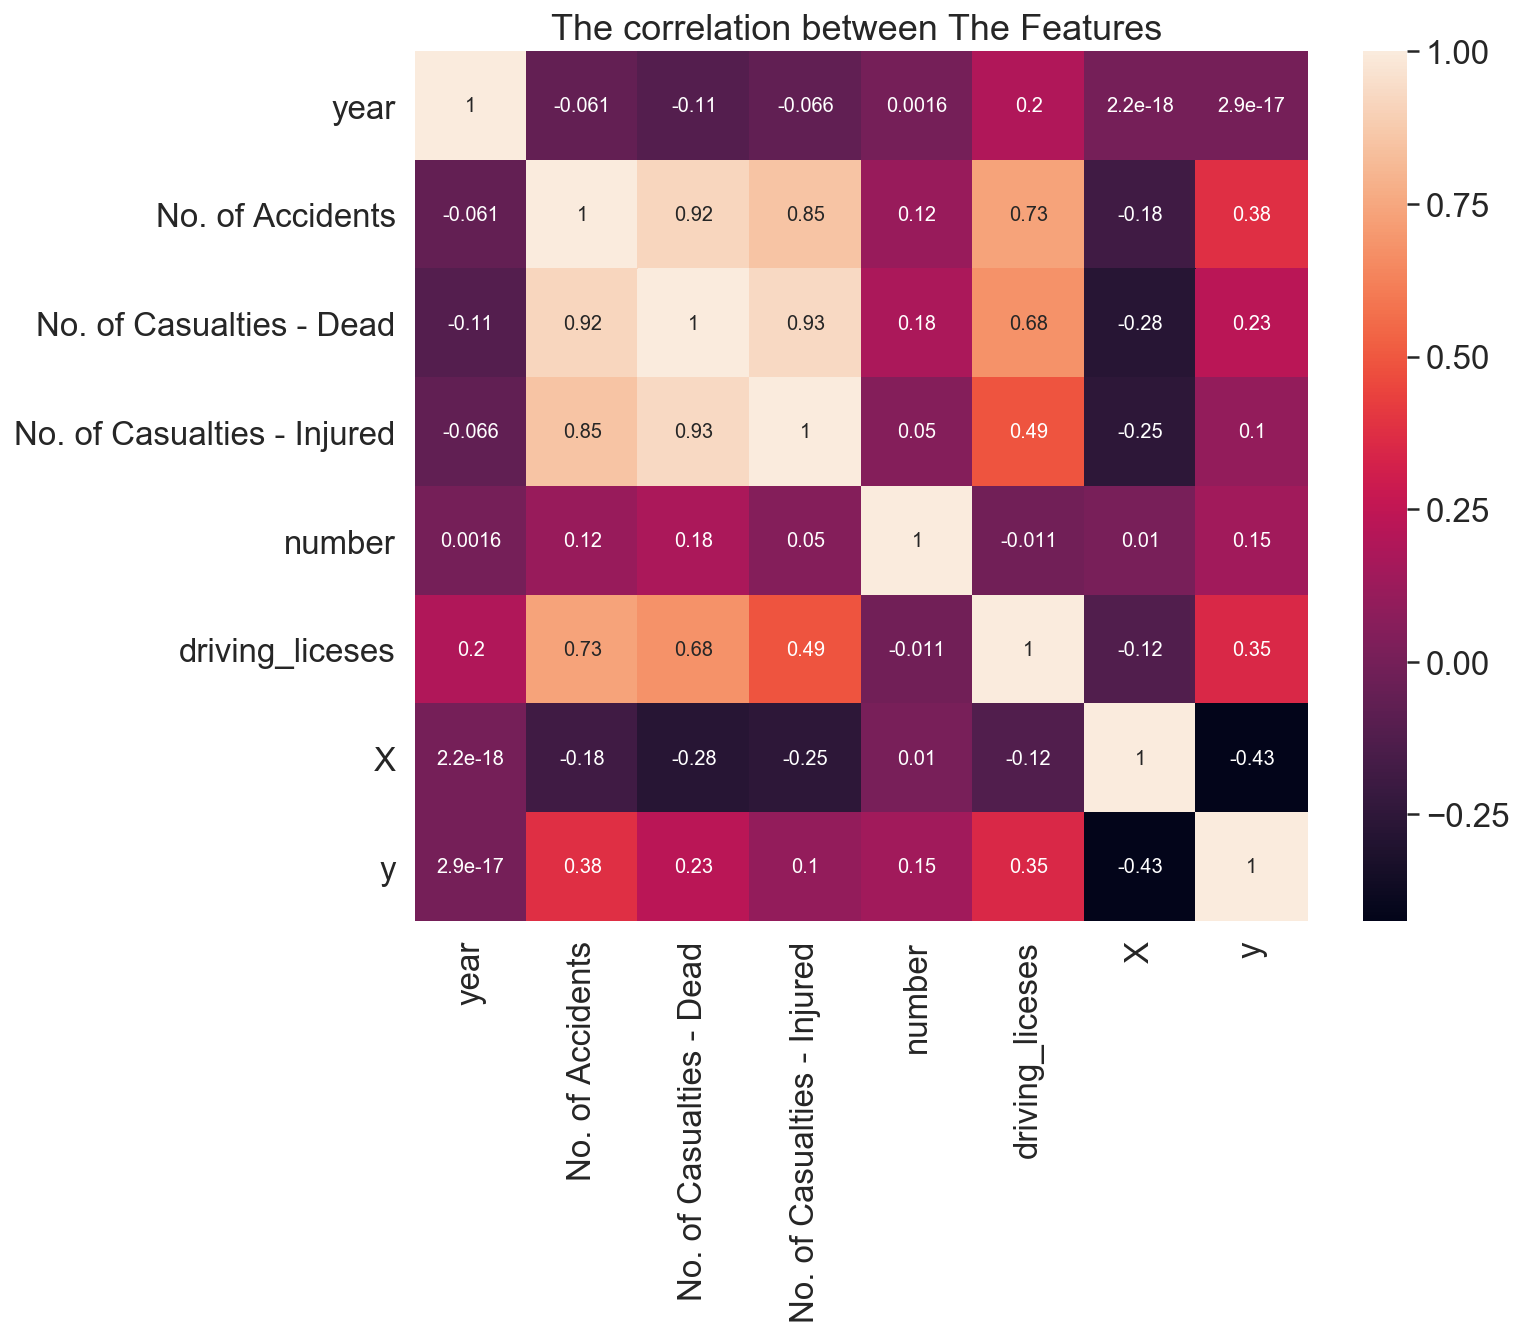

In [849]:
fig=plt.figure(figsize=(10,8))
ax = fig.gca()
sns.heatmap(D_T.corr(), annot=True,ax=ax)# vmin = 0, vmax = +1)
ax.set_title('The correlation between The Features ')
plt.show()

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [832]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))  
    fig, ax = plt.subplots(figsize=(14, 6),nrows=nrows, ncols=2)
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns):
        
        ax[i].hist(dataframe[column]) 
        ax[i].set_title(list_of_titles [i])
        ax[i].set_xlabel(list_of_xlabels [i])






#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

C:\Users\soso\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\soso\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


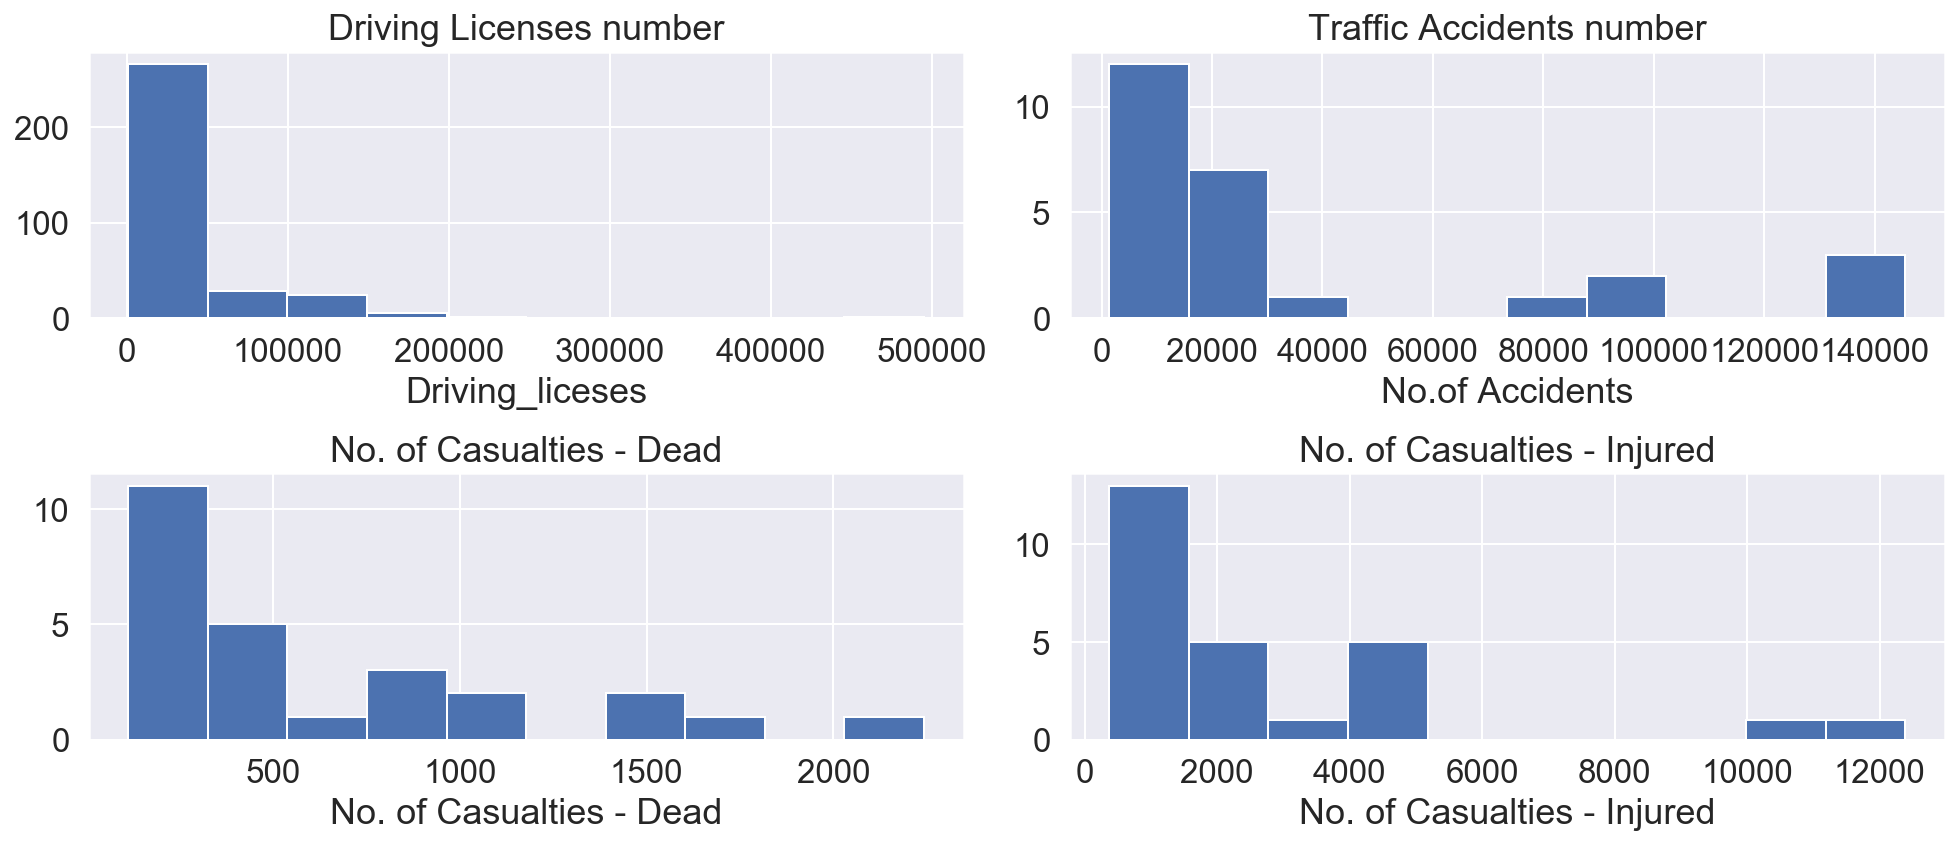

In [846]:
# Code

subplot_histograms(D_T,['driving_liceses', 'No. of Accidents','No. of Casualties - Dead', 'No. of Casualties - Injured']
                   ,['Driving Licenses number', 'Traffic Accidents number','No. of Casualties - Dead', 'No. of Casualties - Injured'],
                   ['Driving_liceses', 'No.of Accidents','No. of Casualties - Dead', 'No. of Casualties - Injured'])
plt.tight_layout()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


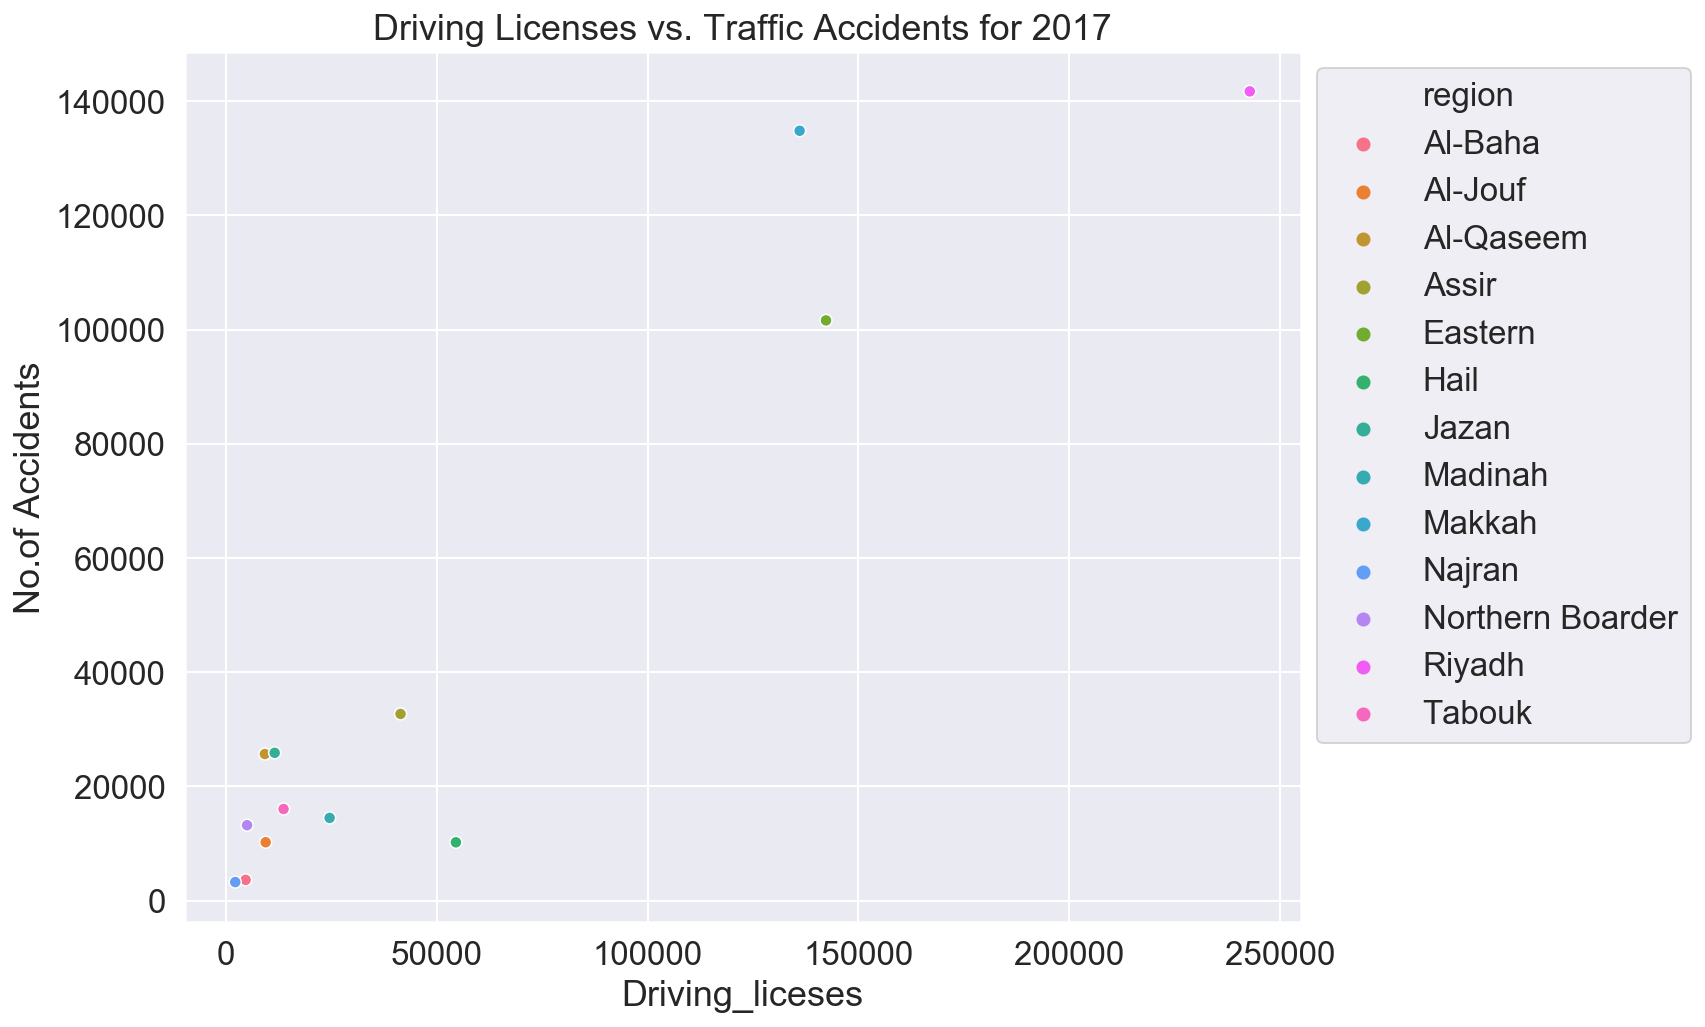

In [836]:
# Code
maskf=D_T.mask(D_T['year']==2017)
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.scatterplot(data=maskf, x='driving_liceses', y= 'No. of Accidents',hue='region'
                 )
ax.set_ylabel("No.of Accidents")
ax.set_xlabel("Driving_liceses")
ax.set_title('Driving Licenses vs. Traffic Accidents for 2017')
plt.legend(bbox_to_anchor=(1,1), loc=2)

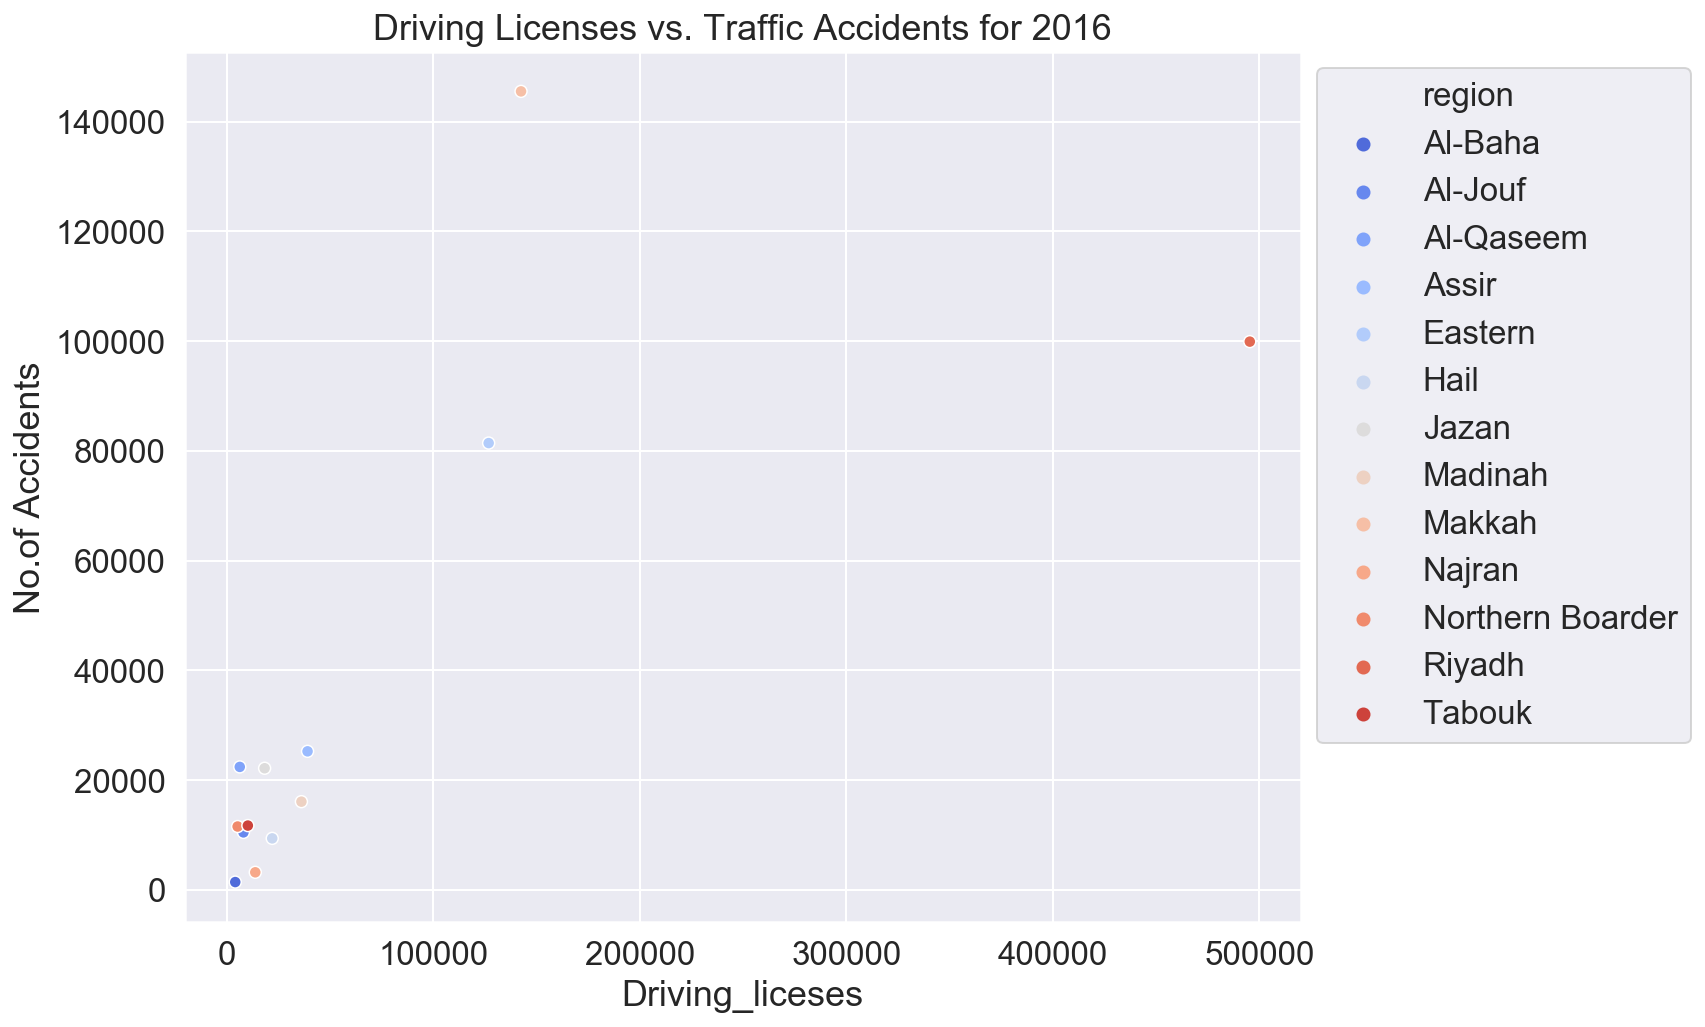

In [837]:
maskf1=D_T.mask(D_T['year']==2016)
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.scatterplot(data=maskf1, x='driving_liceses', y= 'No. of Accidents' ,hue='region',palette='coolwarm'
                 )
ax.set_ylabel("No.of Accidents")
ax.set_xlabel("Driving_liceses")
ax.set_title('Driving Licenses vs. Traffic Accidents for 2016')
plt.legend(bbox_to_anchor=(1,1), loc=2)

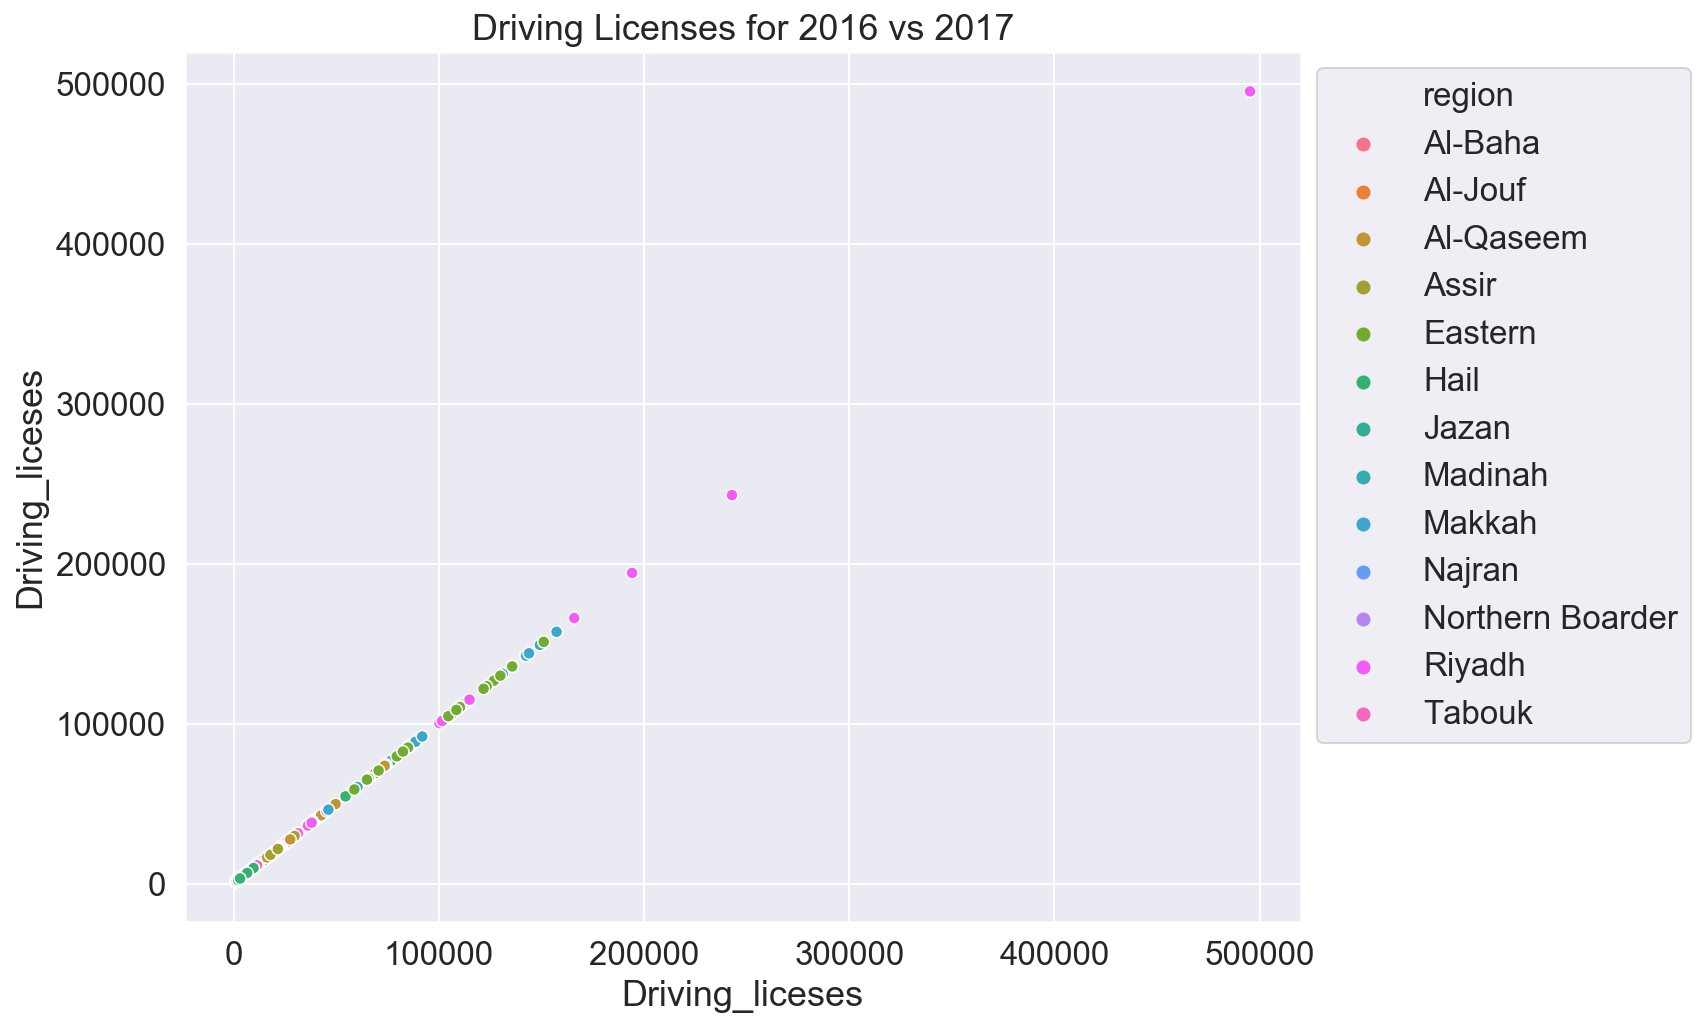

In [839]:
maskf2=D_T.mask((D_T['year']==2017)&(D_T['year']==2016))
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.scatterplot(data=maskf2, x='driving_liceses',hue='region', y= 'driving_liceses',
                 )
ax.set_ylabel("Driving_liceses")
ax.set_xlabel("Driving_liceses")
ax.set_title('Driving Licenses for 2016 vs 2017')

plt.legend(bbox_to_anchor=(1,1), loc=2)

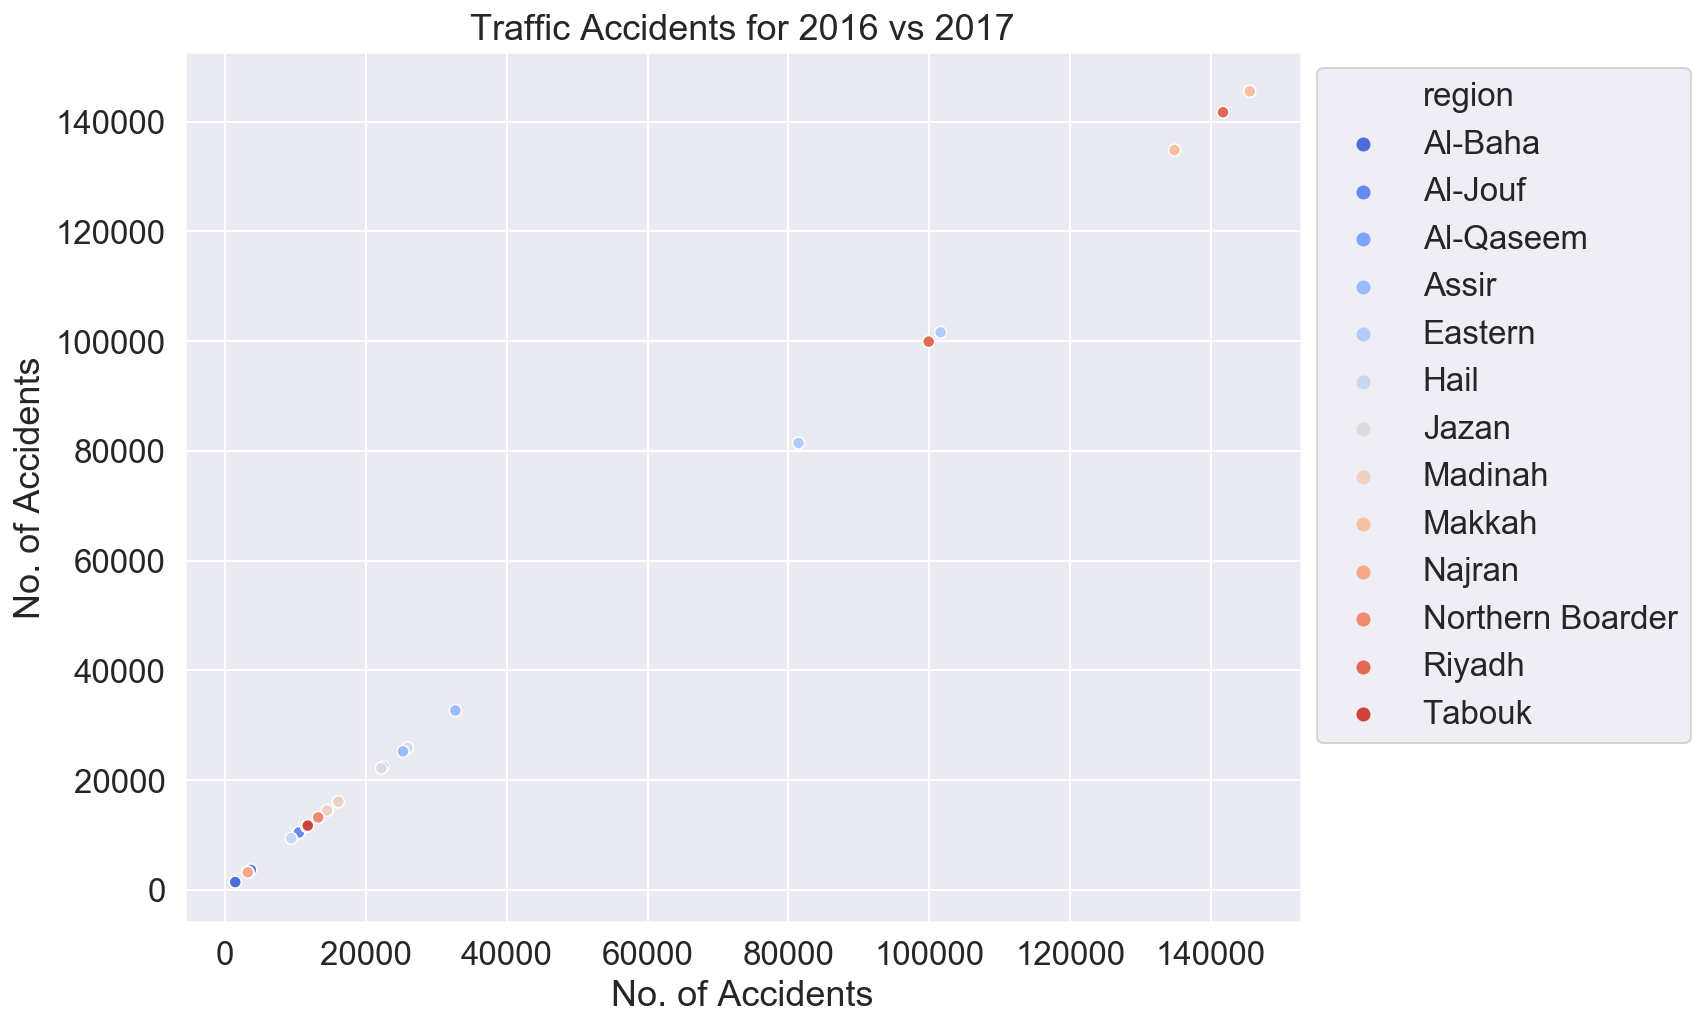

In [841]:

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.scatterplot(data=maskf2, x='No. of Accidents',hue='region', y= 'No. of Accidents',
                 palette='coolwarm')
ax.set_ylabel("No. of Accidents")
ax.set_xlabel("No. of Accidents")
ax.set_title('Traffic Accidents for 2016 vs 2017')

plt.legend(bbox_to_anchor=(1,1), loc=2)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'Year')

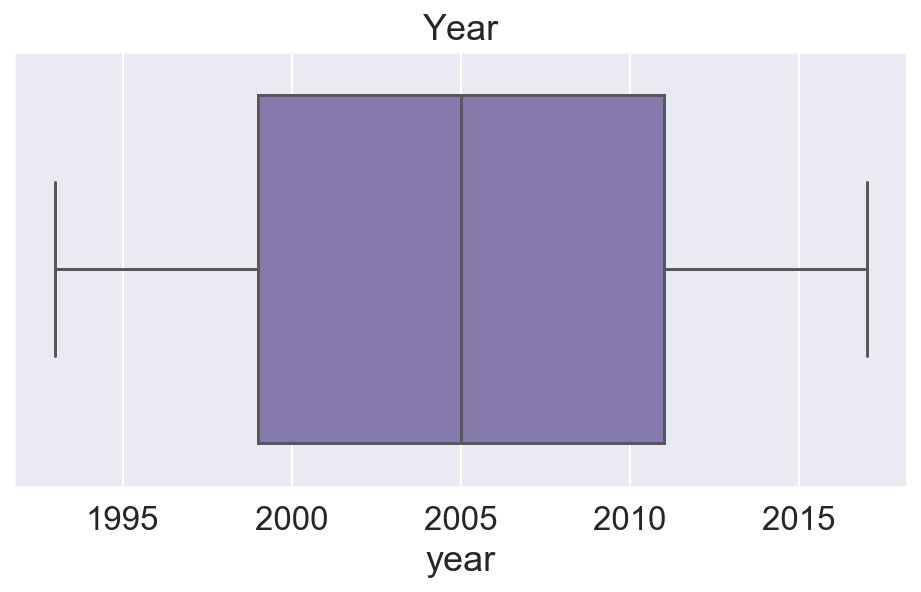

In [909]:
# Code
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

sns.boxplot( palette=['m'], data=D_T,x='year')

ax.set_title("Year")


Text(0.5, 1.0, 'No.of Accidents & driving_liceses')

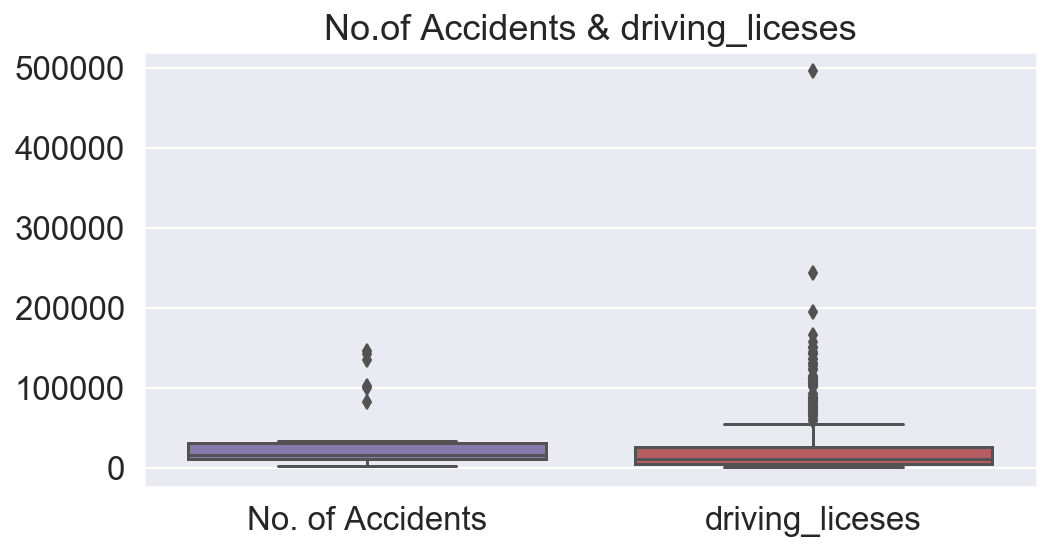

In [914]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
a=D_T[['No. of Accidents','driving_liceses']]
sns.boxplot( palette=['m','r'], data=a)

ax.set_title("No.of Accidents & driving_liceses")

Text(0.5, 1.0, 'No.of Casualties-Dead & Injured')

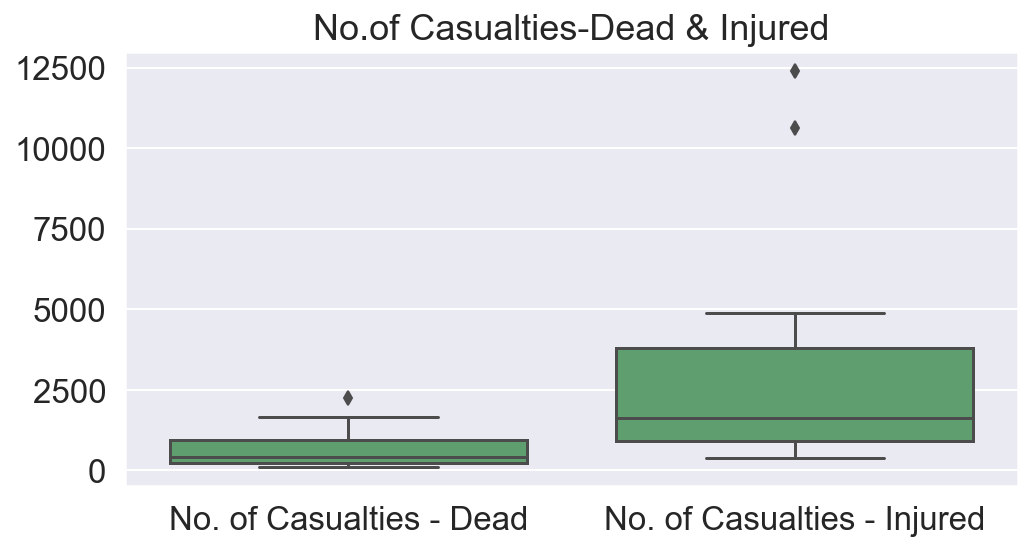

In [902]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
b=D_T[['No. of Casualties - Dead','No. of Casualties - Injured']]
sns.boxplot( data=b, palette=['g'])

ax.set_title("No.of Casualties-Dead & Injured")

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

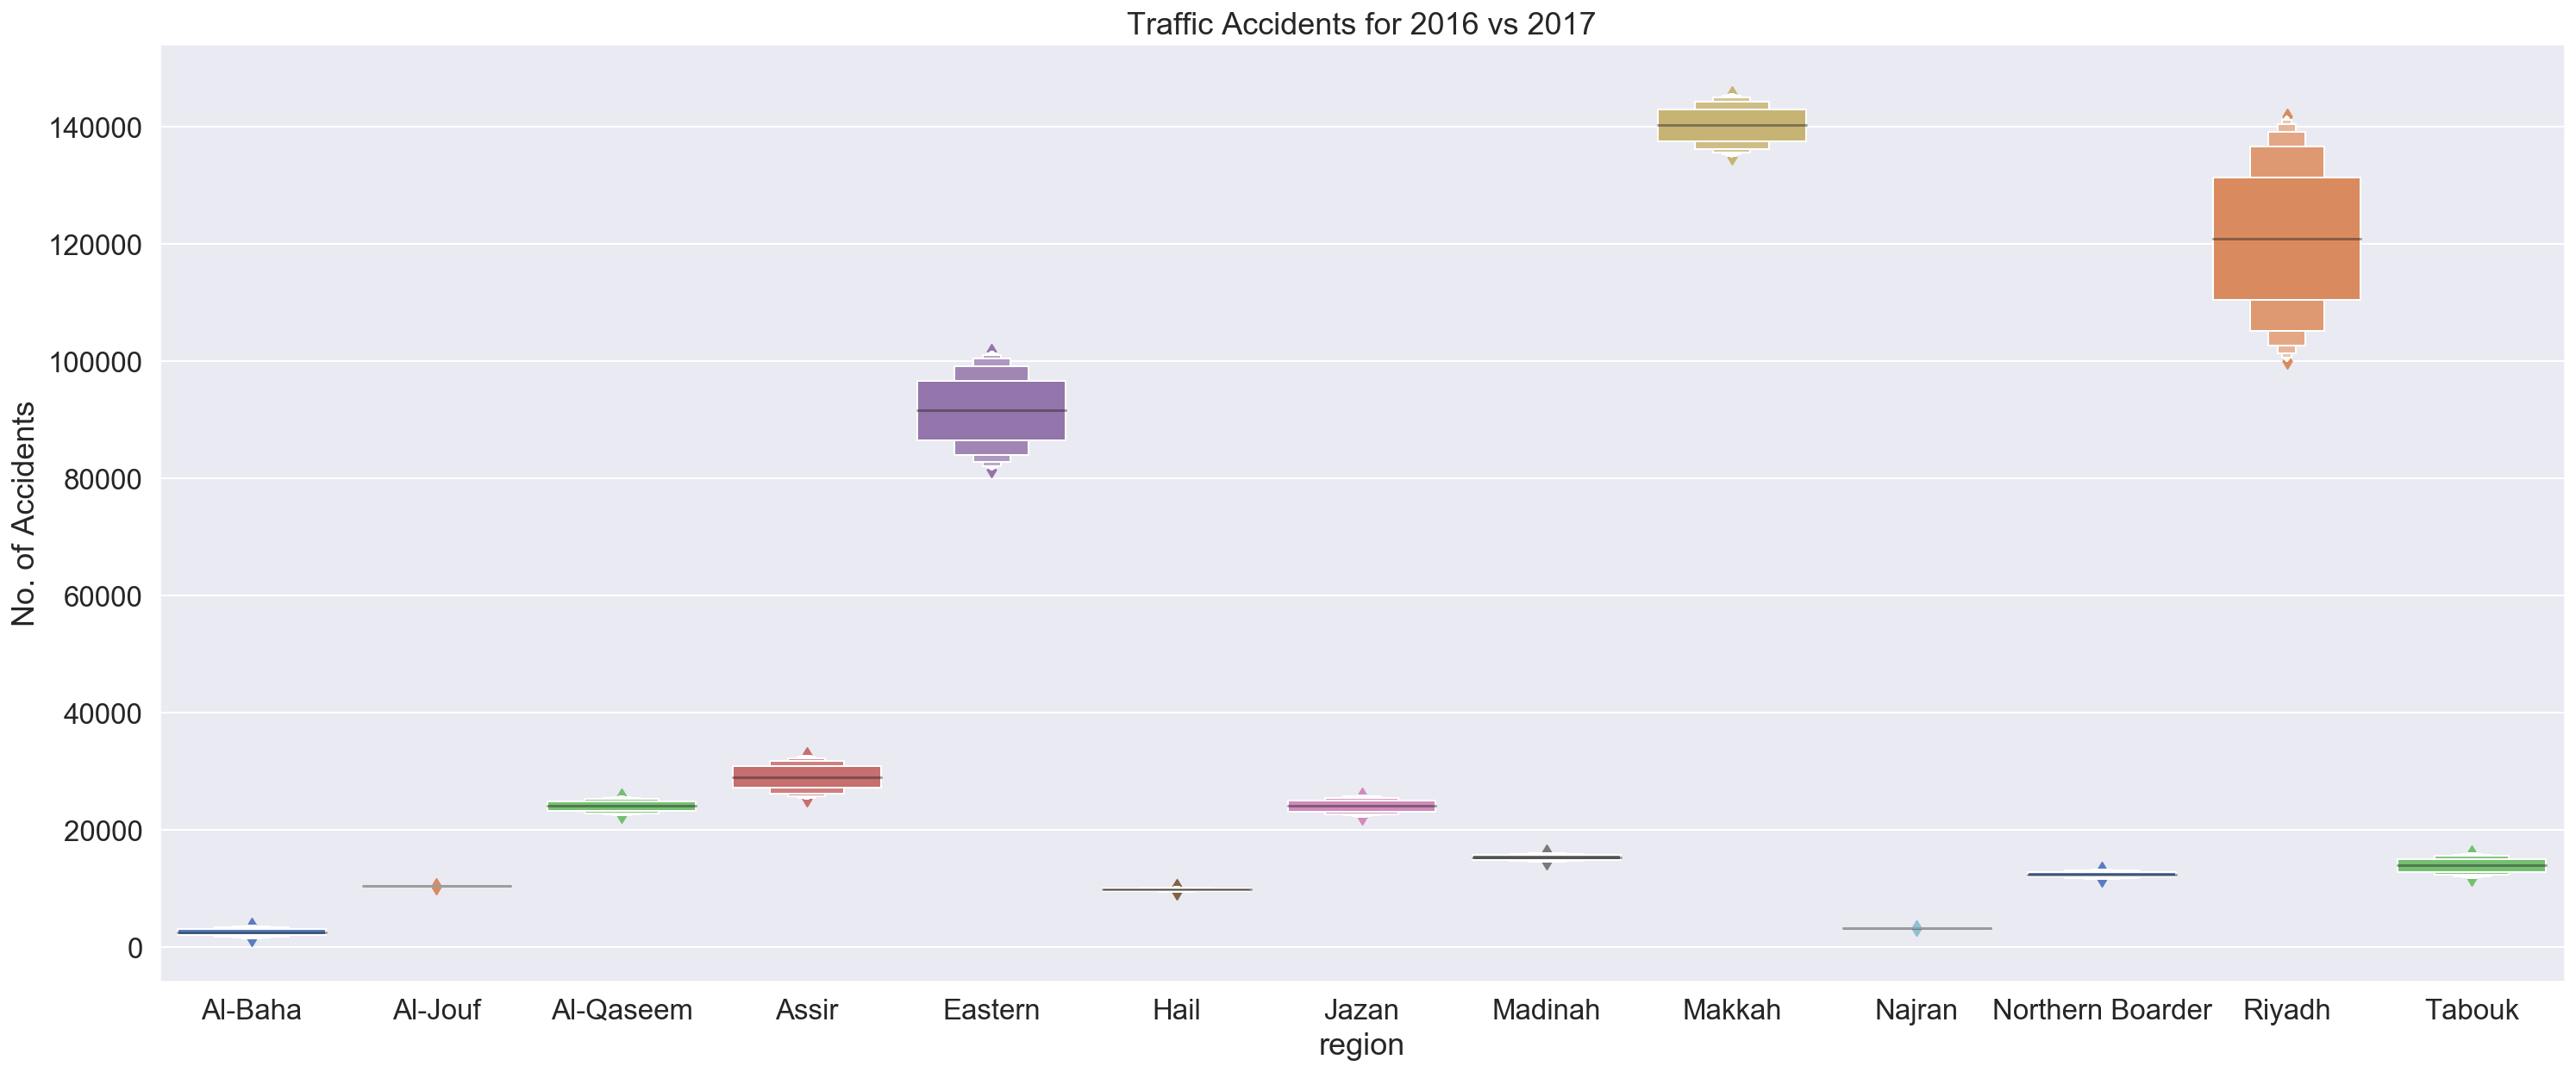

In [894]:
fig = plt.figure(figsize=(25,10))
ax = fig.gca()

sns.boxenplot(x="region", y="No. of Accidents", data=maskf2,palette="muted",ax=ax
               )
ax.set_title('Traffic Accidents for 2016 vs 2017')
plt.show()

Text(0.5, 1.0, 'Driving Licenses for 2016 vs 2017')

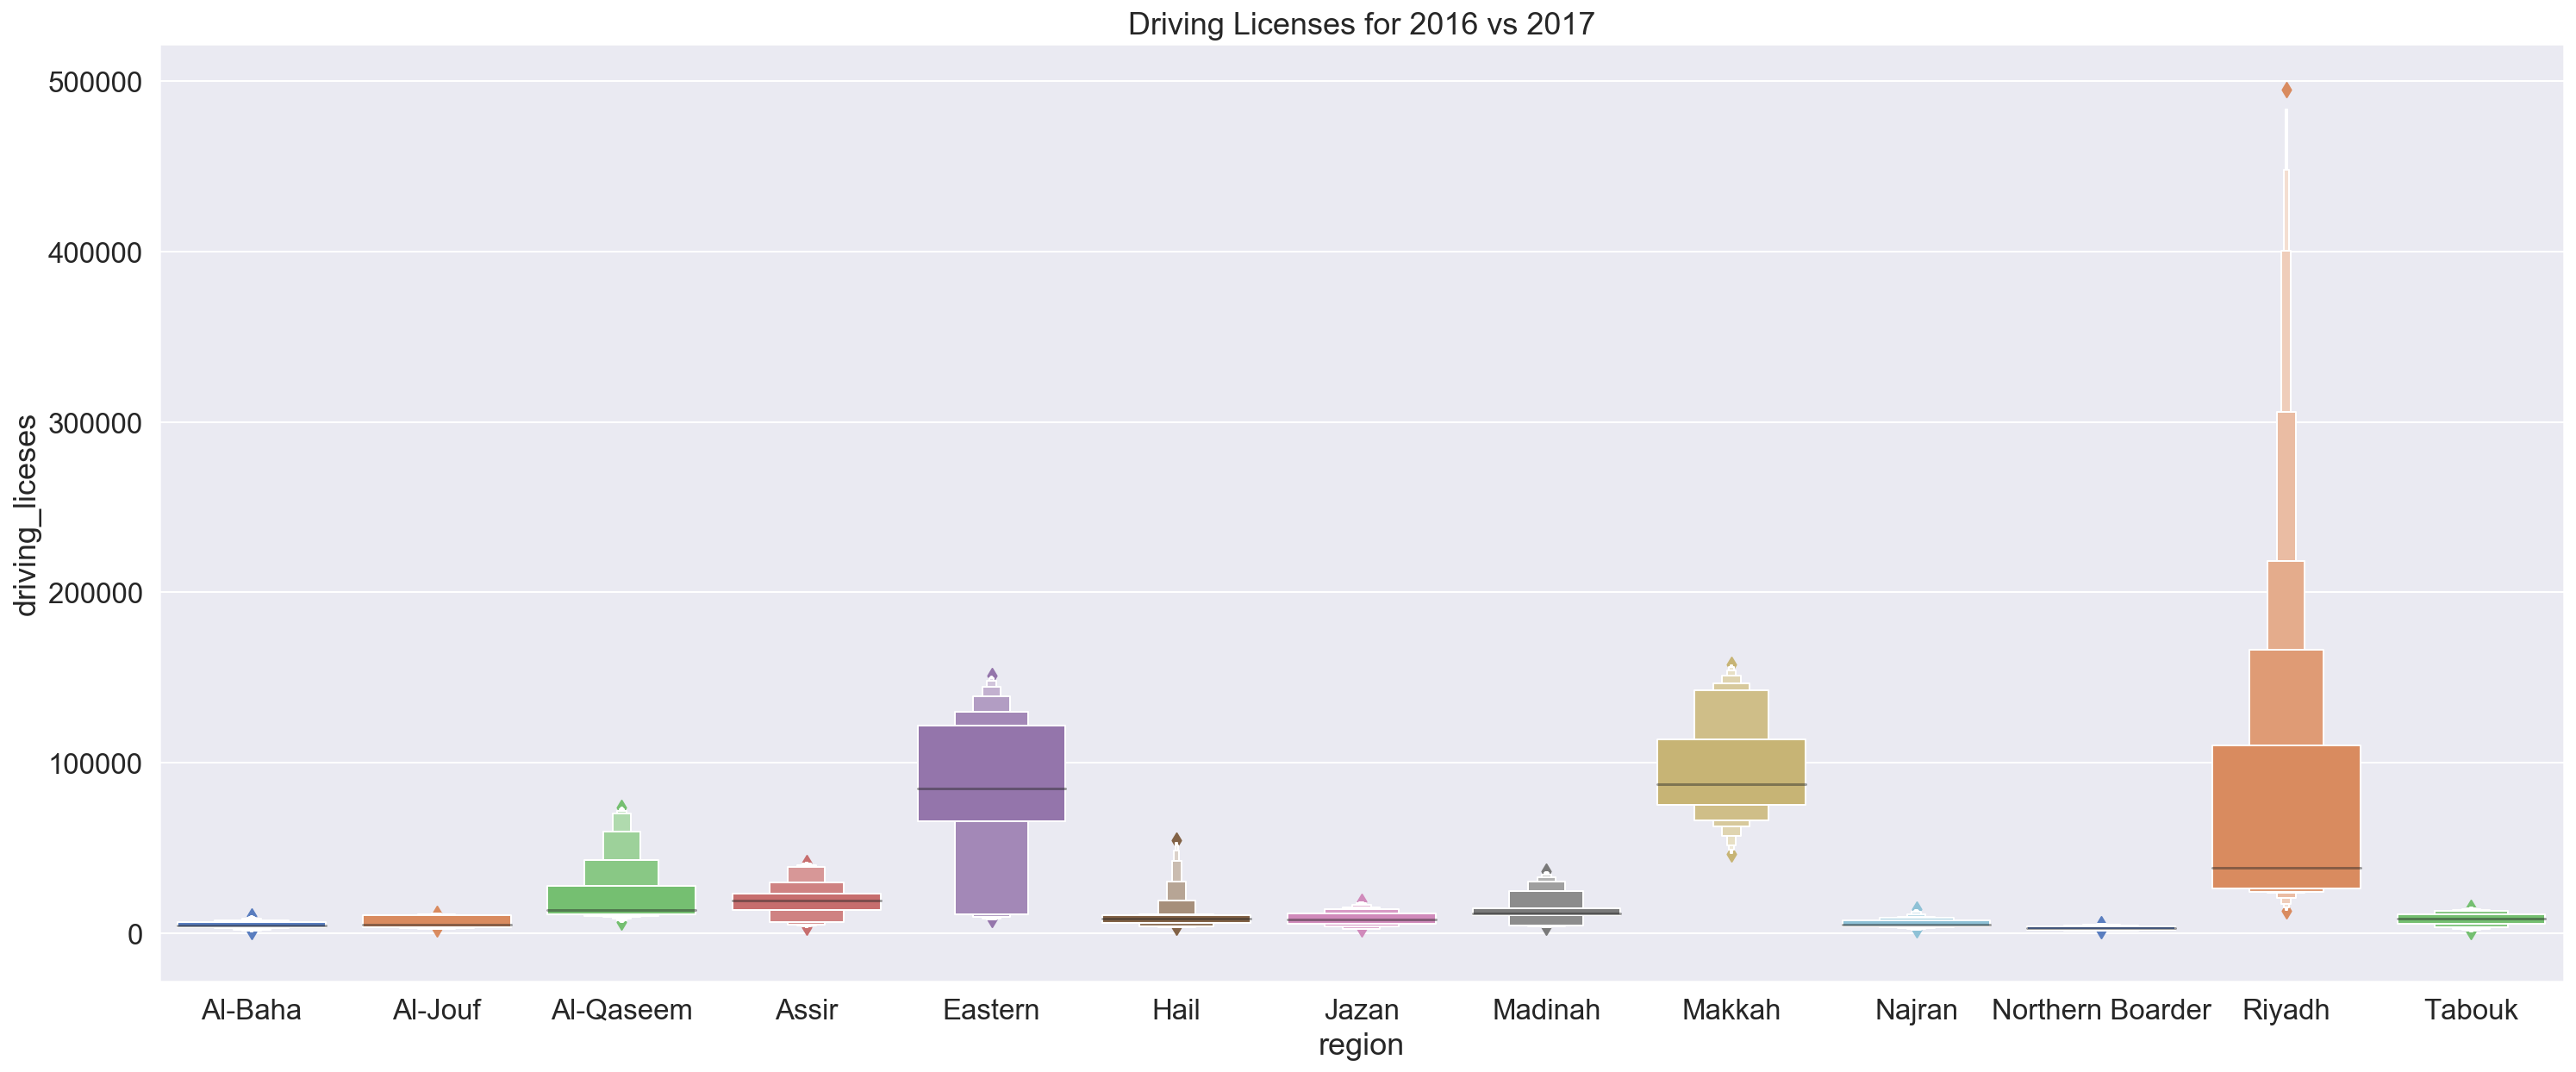

In [893]:
fig = plt.figure(figsize=(25,10))
ax = fig.gca()
sns.boxenplot(x="region", y="driving_liceses", data=maskf2,palette="muted",ax=ax
               )
ax.set_title('Driving Licenses for 2016 vs 2017')


## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

<h2>Answers:</h2>

When a distribution is positively skewed, the mean is greater than the median, which is greater than the mode
and it showes that the all 4 features are positively skewed .


The variance is the average of the distances from the mean squared ,and it show when we calculated that is very high and that means that the data points are very spread out from the mean ,and from one another  .


the standard deviation tells us approximately, on average, the distance of numbers in a distribution from the mean of the distribution.

In [957]:
from scipy import stats
M=stats.mode(D_T['No. of Accidents'])
Mean=np.mean(D_T['No. of Accidents'].dropna())
Meadian=np.median(D_T['No. of Accidents'].dropna())
variance=np.var(D_T['No. of Accidents'])
std=np.std(D_T['No. of Accidents'])


print(f'The mode of No. of Accidents :{M}')
print(f'The mean of No. of Accidents :{Mean}')
print(f'The median of No. of Accidents :{Meadian}')
print(f'The variance of No. of Accidents :{variance}')
print(f'The Standard deviation of No. of Accidents :{std}')


The mode of No. of Accidents :ModeResult(mode=array([1414.]), count=array([1]))
The mean of No. of Accidents :38225.692307692305
The median of No. of Accidents :16050.5
The variance of No. of Accidents :2078523661.4437866
The Standard deviation of No. of Accidents :45590.82869880505


In [958]:
M=stats.mode(D_T['driving_liceses'])
Mean=np.mean(D_T['driving_liceses'].dropna())
Meadian=np.median(D_T['driving_liceses'].dropna())
variance=np.var(D_T['driving_liceses'])
std=np.std(D_T['driving_liceses'])


print(f'The mode of driving_liceses :{M}')
print(f'The mean of driving_liceses :{Mean}')
print(f'The median of driving_liceses :{Meadian}')
print(f'The variance of driving_liceses  :{variance}')
print(f'The Standard deviation of driving_liceses :{std}')

The mode of driving_liceses :ModeResult(mode=array([915], dtype=int64), count=array([1]))
The mean of driving_liceses :28915.347692307692
The median of driving_liceses :10267.0
The variance of driving_liceses  :2241648471.192955
The Standard deviation of driving_liceses :47346.05021744638


In [959]:
M=stats.mode(D_T['No. of Casualties - Injured'])
Mean=np.mean(D_T['No. of Casualties - Injured'].dropna())
Meadian=np.median(D_T['No. of Casualties - Injured'].dropna())
variance=np.var(D_T['No. of Casualties - Injured'])
std=np.std(D_T['No. of Casualties - Injured'])

print(f'The mode of No. of Casualties - Injured :{M}')
print(f'The mean of No. of Casualties - Injured :{Mean}')
print(f'The median of No. of Casualties - Injured:{Meadian}')
print(f'The variance of  No. of Casualties - Injured  :{variance}')
print(f'The Standard deviation of  No. of Casualties - Injured :{std}')

The mode of No. of Casualties - Injured :ModeResult(mode=array([374.]), count=array([1]))
The mean of No. of Casualties - Injured :2743.0384615384614
The median of No. of Casualties - Injured:1618.5
The variance of  No. of Casualties - Injured  :8213299.190828403
The Standard deviation of  No. of Casualties - Injured :2865.8854113220236


In [960]:
M=stats.mode(D_T['No. of Casualties - Dead'])
Mean=np.mean(D_T['No. of Casualties - Dead'].dropna())
Meadian=np.median(D_T['No. of Casualties - Dead'].dropna())
variance=np.var(D_T['No. of Casualties - Dead'])
std=np.std(D_T['No. of Casualties - Dead'])


print(f'The mode of No. of Casualties - Dead :{M}')
print(f'The mean of No. of Casualties - Dead :{Mean}')
print(f'The median of No. of Casualties - Dead :{Meadian}')
print(f'The variance of  No. of Casualties - Dead  :{variance}')
print(f'The Standard deviation of  No. of Casualties - Dead :{std}')

The mode of No. of Casualties - Dead :ModeResult(mode=array([112.]), count=array([1]))
The mean of No. of Casualties - Dead :635.3846153846154
The median of No. of Casualties - Dead :415.5
The variance of  No. of Casualties - Dead  :290636.3136094675
The Standard deviation of  No. of Casualties - Dead :539.1069593406002


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<h3>Answer:</h3>

no

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<h3>Answer:</h3>


no, distribution is positively skewed, the mean is greater than the median, which is greater than the mode and it showes that the all 4 features are positively skewed .

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [976]:
# Code
s=D_T['No. of Accidents'].groupby(D_T['region']).mean().dropna()

In [977]:
t=D_T['driving_liceses'].groupby(D_T['region']).mean().dropna()

In [973]:
from scipy.stats import ttest_ind

In [978]:
ttest_ind(s,t,equal_var=False)

Ttest_indResult(statistic=0.5680970139183046, pvalue=0.5756039386243821)

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

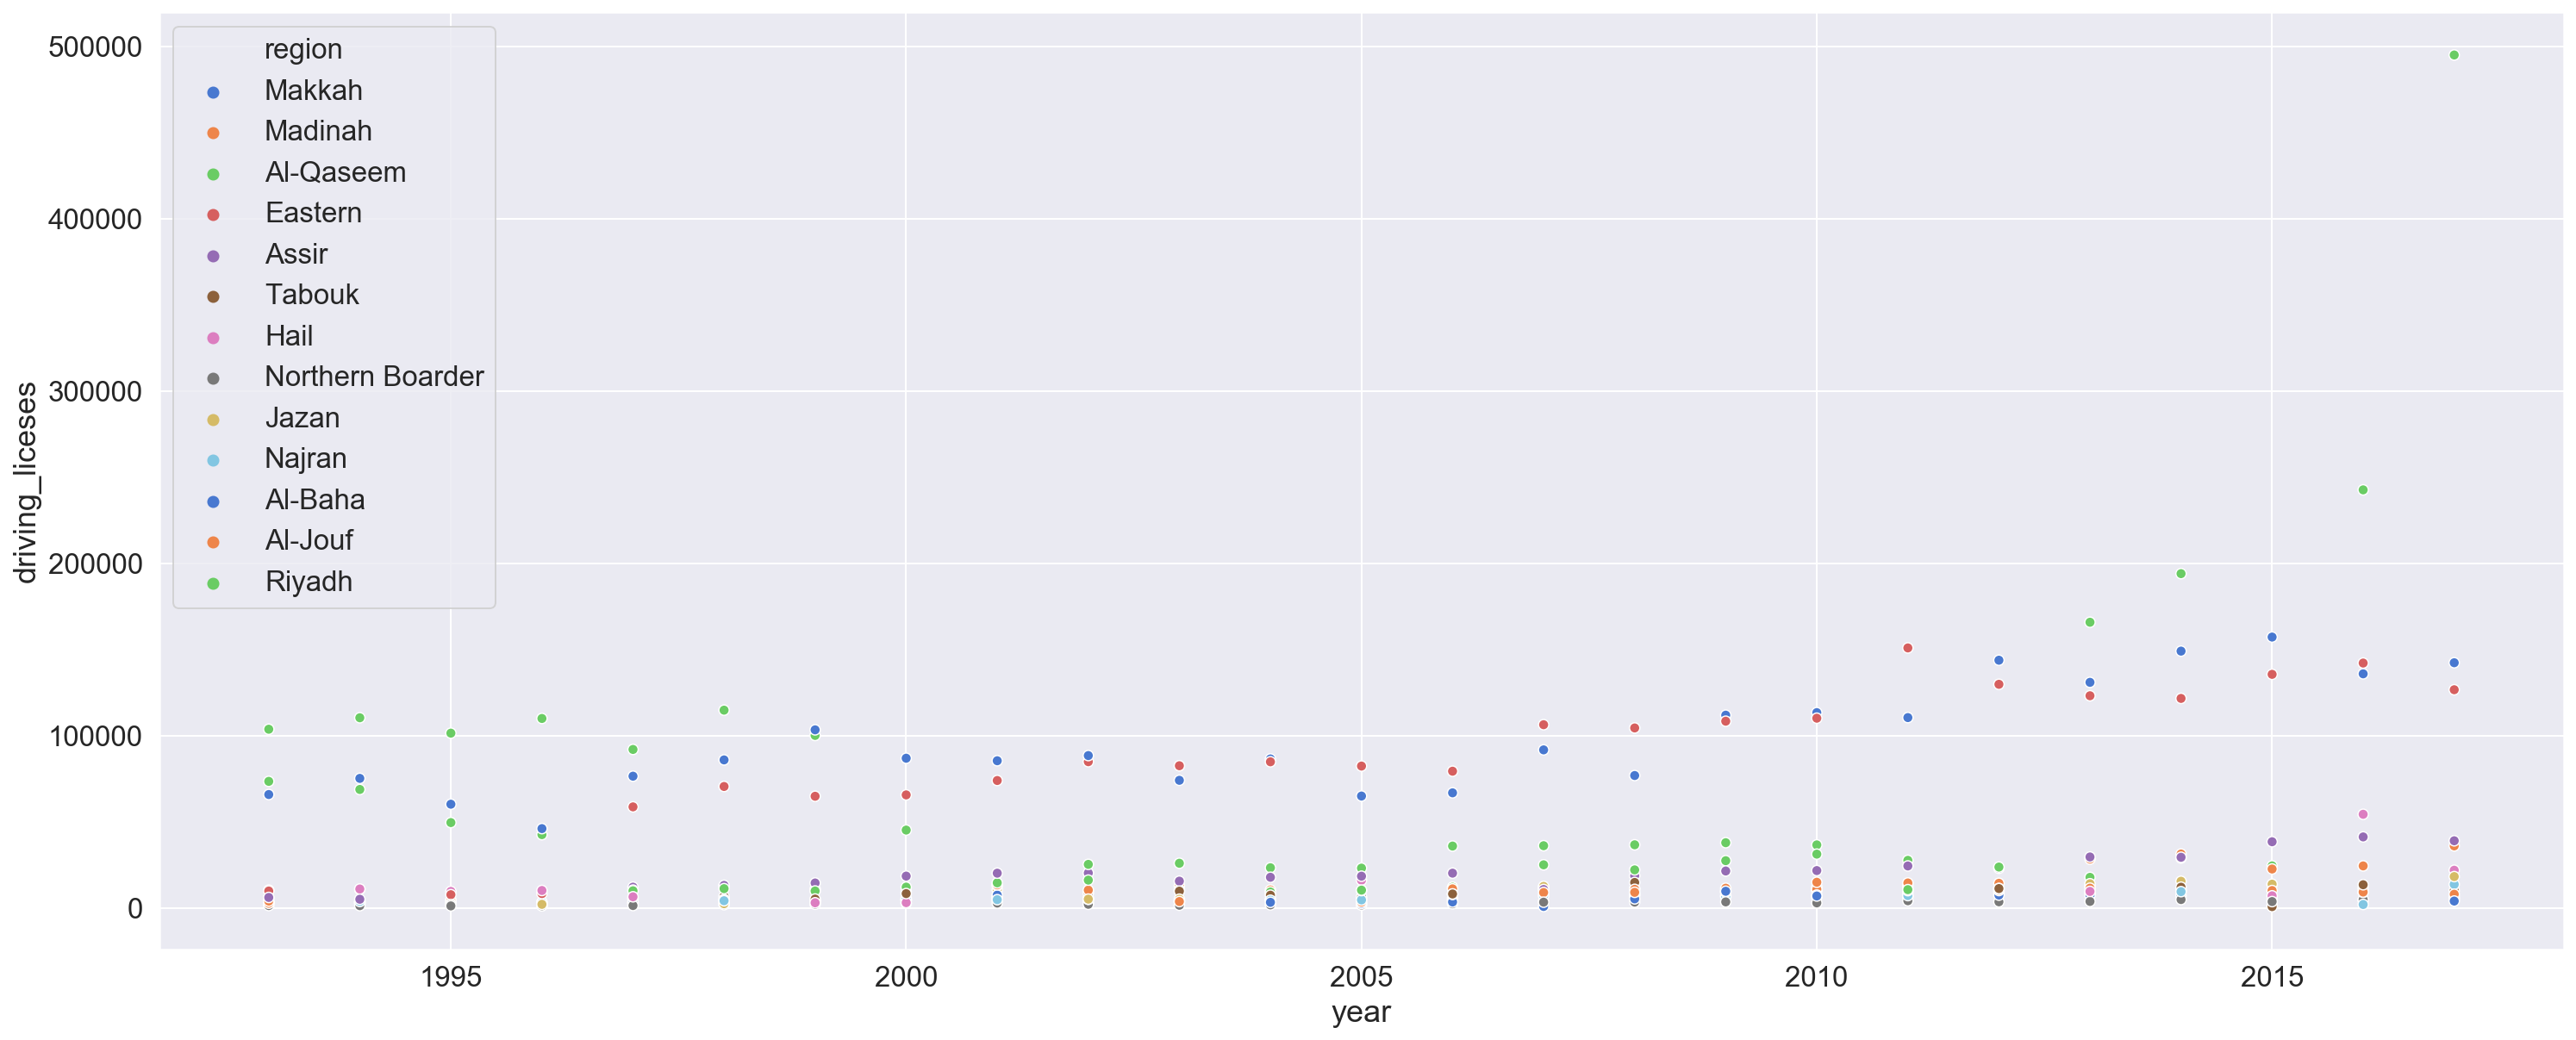

In [990]:
fig = plt.figure(figsize=(25,10))
ax = fig.gca()
sns.scatterplot(x='year', y="driving_liceses", data=driving_licenses,hue='region' ,palette="muted",ax=ax)

<h3>Answer:</h3>

(Riyadh,makkah,Eastern Region)


Through my research on the reasons for increasing the issuance of driving licenses is that the general department of traffic  implemented Strict law and penalties for driving without issue a license.[2]



Based on my analysis of the data , I found that driving licenses are not related to traffic accidents ,in 2016-2017 it shows that the highest driving license has been issued in riyadh and the  highest accident has been in makkah ,so the driving licenses can not be affected to traffic accidents..


also there is some other  factors  may affected  the traffic accidents: 

1-using phone' calling or just chatting ' that will distract the driver .

2-Seatbelts.

3-speeding.

4-eating while driving .

5-non-compliance with traffic signal and etc...[1]



 As the accidents are inventible, it can be minimized. Strict law enforcement of traffic violations can highly affect the total number of accident and hence decrease the numbers of injuries and deaths. Awareness social campaigns that showcase the injuries and deaths caused by traffic violation also is important to remind people that they must obey the rules and respect the road and the other drives to avoid any loss.
 
 [[ 1 ]]  [إحصائيات-الحوادث-في-السعودية](https://ksa.motory.com/ar/الاخبار/إحصائيات-الحوادث-في-السعودية-لعام-1436-هـ-3856/)
 
 
 
[[ 2 ]][لائحة+الجزاءات+والمخالفات+المرورية](https://www.moi.gov.sa/wps/wcm/connect/6cc720b1-24ec-45ba-9976-f297afa61504/لائحة+الجزاءات+والمخالفات+المرورية.pdf?MOD=AJPERES&CVID=jNCcPii)

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

<h3>Answer:</h3>

I recommended  to provide a Strict law enforcement of traffic violations so it can highly affect the total number of accident and hence decrease the numbers of injuries and deaths. Also awareness social campaigns that showcase the injuries and deaths caused by traffic violation also is important to remind people that they must obey the rules and respect the road and the other drives to avoid any loss.

I think if there is any data that contain the violators of traffic rules it will help me as data scientist to solve the problems . 